In [1]:
import credstash
from sqlalchemy import create_engine

In [1]:
# conf = {
#     'host': "datanym-postgres.cluster-c3sbofgewpm1.us-east-1.rds.amazonaws.com",
#     'port': '5432',
#     'database': "datanym",
#     'user': credstash.getSecret('database.aws_rds_cluster.datanym-postgres.user', region='us-east-1',
#                                 profile_name='codenym'),
#     'password': credstash.getSecret('database.aws_rds_cluster.datanym-postgres.password', region='us-east-1',
#                                     profile_name='codenym'),
# }
# engine = create_engine("postgresql://{user}:{password}@{host}:{port}/{database}".format(**conf))

In [5]:
# test query to postgres db
import pandas as pd 
pd.read_sql('SELECT * FROM information_schema.tables', engine)

OperationalError: (psycopg2.OperationalError) connection to server at "myapp-staging.c3sbofgewpm1.us-east-1.rds.amazonaws.com" (10.0.67.175), port 5432 failed: Operation timed out
	Is the server running on that host and accepting TCP/IP connections?

(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [1]:
import csv, sqlite3
import pandas as pd
from datetime import datetime
import sqlite3
con = sqlite3.connect("/Users/isaacflath/github/codenym/DataPipelines/sqlite_527.db")

In [ ]:
# function for runing sql file with many statements and print time elapsed for each one
def run_sql_file(sql_filepath):
    with open(sql_filepath, 'r') as f:
        sql = f.read()
    sql_commands = sql.split(';')
    for command in sql_commands:
        sample = command[:40].replace('\n', ' ')
        print(f"{datetime.now()} : {sample}")
        con.execute(command)
        con.commit()
    con.close()
run_sql_file('8872.sql')

2023-11-10 20:13:39.683297 : drop table recipients_contributors
2023-11-10 20:13:39.725281 :  create table recipients_contributors   
2023-11-10 20:13:39.725761 :   insert into     recipients_contributor
2023-11-10 20:13:40.607024 :   drop table form8872_schedule_a
2023-11-10 20:13:40.608022 :  CREATE TABLE form8872_schedule_a     ( 
2023-11-10 20:13:40.608440 :   drop table form8872_schedule_b
2023-11-10 20:13:40.609047 :  CREATE TABLE form8872_schedule_b     ( 
2023-11-10 20:13:40.609368 :   drop table form8872
2023-11-10 20:13:40.609663 :  CREATE TABLE form8872     (         for
2023-11-10 20:13:40.610013 :    insert into     form8872_schedule_a (


In [20]:
pd.read_sql("select * from sqlite_schema limit 10", con)

DatabaseError: Execution failed on sql 'select * from sqlite_schema limit 10': database is locked

''
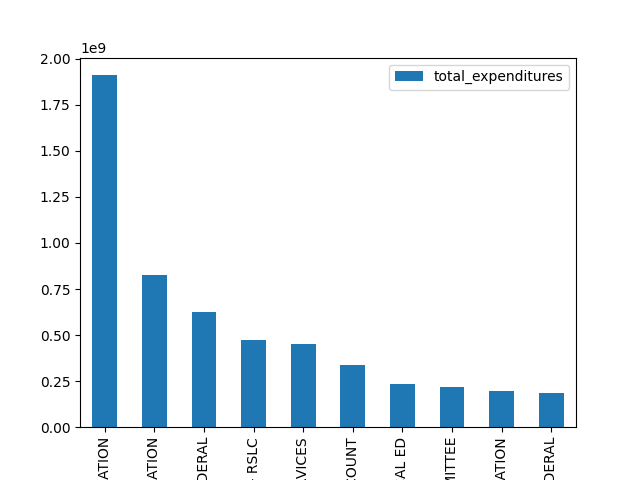

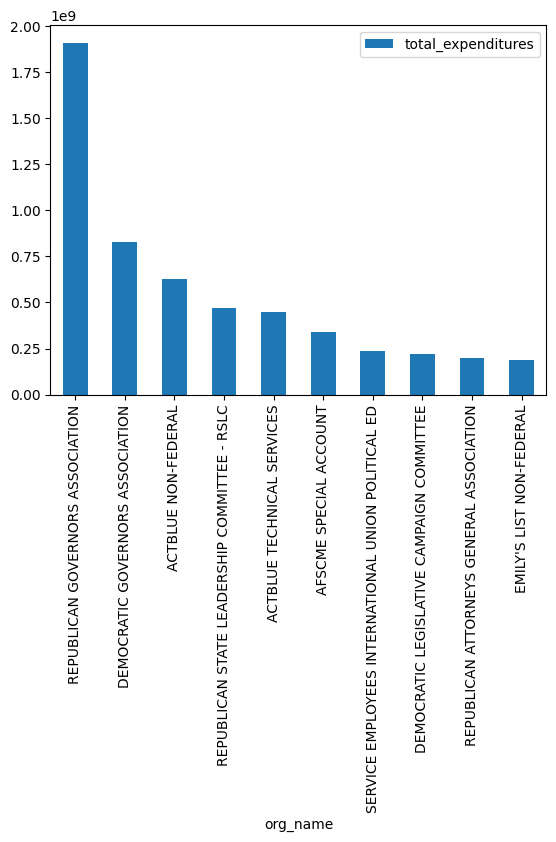

In [16]:
import base64
from io import BytesIO

import matplotlib.pyplot as plt

df = pd.read_sql(f"select * from organization_aggregated_contributions_expenditures order by total_expenditures desc limit 10", con)
df[['org_name', 'total_expenditures']].plot.bar(x='org_name',y='total_expenditures')
buffer = BytesIO()
plt.savefig(buffer, format="png")
image_data = base64.b64encode(buffer.getvalue())

md_content = f"![img](data:image/png;base64,{image_data.decode()})"
md_content

In [3]:
pd.read_sql('''
select * from landing_form8872_b limit 10
''', con)

,record_type,form_id_number,sched_b_id,org_name,ein,reciepient_name,reciepient_address_1,reciepient_address_2,reciepient_address_city,reciepient_address_st,reciepient_address_zip_code,reciepient_address_zip_ext,reciepient_employer,expenditure_amount,recipient_occupation,expenditure_date,expenditure_purpose
0,B,9555268.0,38295.0,HAWAII STATE TEACHERS ASSOCIATION POLITICAL AC...,521073928,HAWAII REPUBLICAN PARTY,725 KAPIOLANI BLVD.,C105,HONOLULU,HI,96813.0,None,None,500.0,None,20030430.0,CONTRIBUTION
1,B,9556563.0,71358.0,HAWAII STATE TEACHERS ASSOCIATION POLITICAL AC...,521073928,GOP HOUSE PAC,CARE OF -,2650 PACIFIC HEIGHTS RD,HONOLULU,HI,96813.0,None,None,750.0,None,20030911.0,REPUBLICAN FUNDRAISER
2,B,9556563.0,71359.0,HAWAII STATE TEACHERS ASSOCIATION POLITICAL AC...,521073928,CITIZENS FOR RESPONSIVE GOVERNMENT,770 KAPIOLANI BLVD,STE 505,HONOLULU,HI,96813.0,None,None,400.0,None,20031218.0,DEMOCRATIC FUNDRAISER
3,B,9558209.0,216569.0,HAWAII STATE TEACHERS ASSOCIATION POLITICAL AC...,521073928,HAWAII DEMOCRATIC PARTY,"770 KAPIOLANI BLVD, SUITE 115",None,HONOLULU,HI,96819.0,None,None,1000.0,None,20040512.0,DONATION FOR CONTINENTAL BREAKFAST AT HAWAII D...
4,B,9558209.0,216570.0,HAWAII STATE TEACHERS ASSOCIATION POLITICAL AC...,521073928,HAWAII REPUBLICAN PARTY,"725 KAPIOLANI BLVD, #C-105",None,HONOLULU,HI,96813.0,None,None,500.0,None,20040601.0,DONATION TO HAWAII REPUBLICAN PARTY FOR HAWAII...
5,B,9558787.0,284393.0,HAWAII STATE TEACHERS ASSOCIATION POLITICAL AC...,521073928,HAWAII DEMOCRATIC PARTY,"770 KAPIOLANI BLVD., SUITE 115",None,HONOLULU,HI,96819.0,None,None,1000.0,None,20040512.0,DONATION FOR CONTINENTAL BREAKFAST AT HAWAII D...
6,B,9558787.0,284394.0,HAWAII STATE TEACHERS ASSOCIATION POLITICAL AC...,521073928,HAWAII REPUBLICAN PARTY,"725 KAPIOLANI BLVD., #C-105",None,HONOLULU,HI,96813.0,None,None,500.0,None,20040601.0,DONATION TO HAWAII REPUBLICAN PARTY FOR HAWAII...
7,B,9559603.0,465756.0,HAWAII STATE TEACHERS ASSOCIATION POLITICAL AC...,521073928,MELODIE ADUJA,47-315 KAMEHAMEHA HWY,None,KANEOHE,HI,96744.0,None,SELF EMPLOYED,3000.0,POLITICIAN,20040831.0,POLITICAL CONTRIBUTION
8,B,9559603.0,465757.0,HAWAII STATE TEACHERS ASSOCIATION POLITICAL AC...,521073928,FRIENDS OF ROSALYN BAKER,PO BOX 10394,None,LAHAINA,HI,96761.0,None,SELF EMPLOYED,3000.0,POLITICIAN,20040831.0,POLITICAL CONTRIBUTION
9,B,9559603.0,465758.0,HAWAII STATE TEACHERS ASSOCIATION POLITICAL AC...,521073928,FRIENDS OF GARY HOOSER,5685 OHELO ROAD,None,KAPAA,HI,96746.0,None,SELF EMPLOYED,4000.0,POLITICIAN,20040831.0,POLITICAL CONTRIBUTION


In [4]:
pd.read_sql('''
with total_contributions as (
select org_name, sum(contribution_amount) as total_contributions
from landing_form8872_a
group by org_name
), total_expenditures as (
select org_name, sum(expenditure_amount) as total_expenditures
from landing_form8872_b
group by org_name
)
select 
    org_name, 
    total_contributions,
    total_expenditures
from total_contributions 
full outer join total_expenditures USING (org_name)
ORDER BY total_contributions DESC
''', con)



,org_name,total_contributions,total_expenditures
0,REPUBLICAN GOVERNORS ASSOCIATION,1.888669e+09,1.910641e+09
1,DEMOCRATIC GOVERNORS ASSOCIATION,8.671892e+08,8.267672e+08
2,ACTBLUE NON-FEDERAL,6.407296e+08,6.272768e+08
3,ACTBLUE TECHNICAL SERVICES,5.652198e+08,4.509028e+08
4,REPUBLICAN STATE LEADERSHIP COMMITTEE - RSLC,4.615408e+08,4.714395e+08
...,...,...,...
3490,WASHINGTON STATE AUTO DEALERS POLITICAL ACTIO...,NaN,6.250000e+02
3491,WI LABORERS DISTRICT COUNCIL POLITICAL FUND,NaN,6.234700e+05
3492,WISCONSIN COUNCIL 40 PEOPLE FUND,NaN,2.778496e+06
3493,WORLDCOM CALIFORNIA PAC,NaN,3.000000e+03
